In [124]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

In [92]:
# Specify the path to your main folder containing subfolders with CSV files
main_path = r"C:\Users\vaugh\Desktop\basketball-pf-research\nba.com data"

# Recursively search for all CSV files in the subfolders
all_files = [f for f in glob.glob(os.path.join(main_path, "**/*.csv"), recursive=True)]

# Combine all files into a single DataFrame
tracking_stats_dfs = {}
for filename in all_files:
    shortened_filename = filename.split('\\')[-1]
    print(shortened_filename)
    tracking_stats_dfs[shortened_filename[:-4]] = pd.read_csv(filename)

# Read in the basketball-reference dataframe
bball_ref_data = pd.read_csv(r"C:\Users\vaugh\Desktop\basketball-pf-research\Basketball-reference data\df_with_all_pf(2001-2019).csv")

2013-14.csv
2014-15.csv
2015-16.csv
2016-17.csv
2017-18.csv
2018-19.csv
2019-20.csv
2020-21.csv
2021-22.csv
2022-23.csv
2023-24.csv


In [93]:
import difflib

def clean_tracking_dfs(df):
    # Drop unneccessary columns in the nba.com dataframes
    col_to_drop = ['Unnamed: 0', 'PTS%', 'FT%', 'Contested OREB', 'Contested OREB%', 'OREB Chances', 'Deferred OREB Chances', 'Adjusted OREB Chance%', 'AVG OREB Distance', 'Contested DREB', 'Contested DREB%', 'DREB Chances', 'Deferred DREB Chances', 'Adjusted DREB Chance%', 'AVG DREB Distance', 'DFGM', 'DFGA', 'DFG%']
    for col in col_to_drop:
        close_matches = difflib.get_close_matches(col, df.columns, n=1)
        df.drop(columns=close_matches, inplace=True)
    
    # Rename columns in the nba.com dataframes for better understanding
    df.rename(columns = {'FGM': 'FGM - DRIVES', 'FGA': 'FGA - DRIVES', 'FG%': 'FG% - DRIVES', 'FTM': 'FTM - DRIVES', 'FTA': 'FTA - DRIVES', 'PASS': 'PASS - DRIVES', 'PASS%': 'PASS% - DRIVES', 'AST': 'AST - DRIVES', 'AST%': 'AST% - DRIVES', 'TO': 'TO - DRIVES', 'TOV%': 'TOV% - DRIVES', 'PF': 'PF - DRIVES', 'PF%': 'PF% - DRIVES'}, inplace=True)
    
    # Adjusting some of the stats and removing the remaining unneccesary stat columns
    df['FGA per drive'] = (df['FGA - DRIVES'] / df['DRIVES']).round(3)
    df['FTA per drive'] = (df['FTA - DRIVES'] / df['DRIVES']).round(3)
    df['AST per drive'] = (df['AST - DRIVES'] / df['DRIVES']).round(3)
    df['TOV per drive'] = (df['TO - DRIVES'] / df['DRIVES']).round(3)
    
    more_col_to_drop = ['W', 'L', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH', 'PTS PER PAINT TOUCH', 'FGM - DRIVES', 'FGA - DRIVES', 'FG% - DRIVES', 'FTM - DRIVES', 'FTA - DRIVES', 'PASS - DRIVES', 'AST - DRIVES', 'TO - DRIVES', 'PF - DRIVES', 'PF% - DRIVES', 'eFG%']

    for col in more_col_to_drop:
        close_matches = difflib.get_close_matches(col, df.columns, n=1)
        df.drop(columns=close_matches, inplace=True)

# Clean all of the tracking stat dataframes from nba.com
for df in tracking_stats_dfs:
    clean_tracking_dfs(tracking_stats_dfs[df])

In [94]:
# Adding a Season column in each df
for df in tracking_stats_dfs:
    tracking_stats_dfs[df]['Season'] = '20' + df[-2:]

# Concatenate all dataframes in the list into a single dataframe and set the index appropriately
combined_tracking_df = pd.concat(tracking_stats_dfs, ignore_index=True)

In [95]:
combined_tracking_df

,PLAYER,TEAM,GP,MIN,PTS,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC PER TOUCH,AVG DRIB PER TOUCH,...,OREB Chance%,DREB,DREB Chance%,STL,BLK,FGA per drive,FTA per drive,AST per drive,TOV per drive,Season
0,Adonis Thomas,PHI,6,6.3,2.3,6.3,4.7,0.2,2.08,1.05,...,0.0,1.5,100.0,0.0,0.0,0.667,0.000,0.000,0.000,2014
1,Al Harrington,WAS,33,15.0,6.6,24.9,15.1,0.6,1.47,0.58,...,30.6,2.2,54.8,0.4,0.0,0.519,0.185,0.037,0.074,2014
2,Al Horford,ATL,29,33.0,18.6,63.0,40.6,1.8,1.75,0.49,...,50.0,6.1,59.1,0.9,1.5,0.467,0.200,0.067,0.067,2014
3,Al-Farouq Aminu,NOP,80,25.6,7.2,31.5,21.4,1.1,2.11,1.03,...,41.1,4.7,62.5,1.0,0.5,0.409,0.227,0.091,0.136,2014
4,Alan Anderson,BKN,77,22.7,7.1,26.8,16.9,1.3,2.81,1.83,...,30.5,2.1,48.2,0.6,0.1,0.433,0.200,0.067,0.100,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,Robert Williams III,POR,6,19.8,6.8,21.8,12.5,0.5,1.33,0.29,...,44.0,4.5,84.4,1.2,1.2,1.000,0.000,0.000,0.000,2024
2769,Royce O'Neale,PHX,77,24.6,7.7,43.8,21.3,1.4,1.87,1.03,...,35.0,4.1,60.1,0.8,0.5,0.300,0.100,0.150,0.100,2024
2770,Rui Hachimura,LAL,67,26.9,13.6,32.3,18.6,1.0,1.87,0.96,...,38.4,3.7,59.5,0.6,0.4,0.630,0.222,0.074,0.037,2024
2771,Saddiq Bey,ATL,63,32.7,13.7,40.0,23.1,1.1,1.62,0.79,...,54.6,3.9,66.1,0.8,0.2,0.487,0.308,0.051,0.077,2024


In [96]:
combined_tracking_df.columns

Index(['PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'TOUCHES', 'FRONT CT TOUCHES',
       'TIME OF POSS', 'AVG SEC PER TOUCH', 'AVG DRIB PER TOUCH',
       'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS', 'PAINT TOUCHES', 'DRIVES',
       'PASS% - DRIVES', 'AST% - DRIVES', 'TOV% - DRIVES', 'Drive PTS',
       'Drive FG%', 'C&S PTS', 'C&S FG%', 'Pull Up PTS', 'Pull Up FG%',
       'Paint Touch PTS', 'Paint Touch FG%', 'Post Touch PTS',
       'Post Touch FG%', 'Elbow Touch PTS', 'Elbow Touch FG%', 'OREB',
       'OREB Chance%', 'DREB', 'DREB Chance%', 'STL', 'BLK', 'FGA per drive',
       'FTA per drive', 'AST per drive', 'TOV per drive', 'Season'],
      dtype='object')

In [97]:
combined_tracking_df['Touches'] = combined_tracking_df['TOUCHES'] / (combined_tracking_df['MIN'] / combined_tracking_df['GP']) * 48
combined_tracking_df['Player'] = combined_tracking_df['PLAYER']

closest_match = difflib.get_close_matches('AVG SEC PER TOUCH', combined_tracking_df.columns, n=1)
combined_tracking_df['Avg Sec Per Touch'] = combined_tracking_df[closest_match[0]]

closest_match = difflib.get_close_matches('AVG DRIB PER TOUCH', combined_tracking_df.columns, n=1)
combined_tracking_df['Avg Dribbles Per Touch'] = combined_tracking_df[closest_match[0]]

closest_match = difflib.get_close_matches('FRONT CT TOUCHES', combined_tracking_df.columns, n=1)
combined_tracking_df['% Touches - Front Ct'] = combined_tracking_df[closest_match[0]] / combined_tracking_df['TOUCHES']

closest_match = difflib.get_close_matches('ELBOW TOUCHES', combined_tracking_df.columns, n=1)
combined_tracking_df['% Touches - Elbow'] = combined_tracking_df[closest_match[0]] / combined_tracking_df['TOUCHES']

closest_match = difflib.get_close_matches('POST UPS', combined_tracking_df.columns, n=1)
combined_tracking_df['% Touches - Post Ups'] = combined_tracking_df[closest_match[0]] / combined_tracking_df['TOUCHES']

closest_match = difflib.get_close_matches('PAINT TOUCHES', combined_tracking_df.columns, n=1)
combined_tracking_df['% Touches - Paint'] = combined_tracking_df[closest_match[0]] / combined_tracking_df['TOUCHES']

closest_match = difflib.get_close_matches('DRIVES', combined_tracking_df.columns, n=1)
combined_tracking_df['% Touches - Drives'] = combined_tracking_df[closest_match[0]] / combined_tracking_df['TOUCHES']

col_to_drop = ['PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'TOUCHES', 'FRONT CT TOUCHES',
       'TIME OF POSS', 'AVG SEC PER TOUCH', 'AVG DRIB PER TOUCH',
       'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS', 'PAINT TOUCHES', 'DRIVES',
       'PASS% - DRIVES', 'AST% - DRIVES', 'TOV% - DRIVES', 'Drive PTS',
       'Drive FG%', 'C&S PTS', 'C&S FG%', 'Pull Up PTS', 'Pull Up FG%',
       'Paint Touch PTS', 'Paint Touch FG%', 'Post Touch PTS',
       'Post Touch FG%', 'Elbow Touch PTS', 'Elbow Touch FG%', 'OREB',
       'OREB Chance%', 'DREB', 'DREB Chance%', 'STL', 'BLK', 'TOV per drive']

for col in col_to_drop:
        close_matches = difflib.get_close_matches(col, combined_tracking_df.columns, n=1)
        combined_tracking_df.drop(columns=close_matches, inplace=True)

combined_tracking_df['Season'] = combined_tracking_df['Season'].astype(int)

In [98]:
combined_tracking_df

,FGA per drive,FTA per drive,AST per drive,Season,Touches,Player,Avg Sec Per Touch,Avg Dribbles Per Touch,% Touches - Front Ct,% Touches - Elbow,% Touches - Post Ups,% Touches - Paint,% Touches - Drives
0,0.667,0.000,0.000,2014,288.000000,Adonis Thomas,2.08,1.05,0.746032,0.000000,0.031746,0.000000,0.047619
1,0.519,0.185,0.037,2014,2629.440000,Al Harrington,1.47,0.58,0.606426,0.028112,0.024096,0.048193,0.108434
2,0.467,0.200,0.067,2014,2657.454545,Al Horford,1.75,0.49,0.644444,0.106349,0.112698,0.122222,0.023810
3,0.409,0.227,0.091,2014,4725.000000,Al-Farouq Aminu,2.11,1.03,0.679365,0.044444,0.015873,0.098413,0.069841
4,0.433,0.200,0.067,2014,4363.559471,Alan Anderson,2.81,1.83,0.630597,0.011194,0.007463,0.022388,0.111940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,1.000,0.000,0.000,2024,317.090909,Robert Williams III,1.33,0.29,0.573394,0.100917,0.000000,0.215596,0.009174
2769,0.300,0.100,0.150,2024,6580.682927,Royce O'Neale,1.87,1.03,0.486301,0.009132,0.000000,0.018265,0.045662
2770,0.630,0.222,0.074,2024,3861.591078,Rui Hachimura,1.87,0.96,0.575851,0.024768,0.040248,0.092879,0.083591
2771,0.487,0.308,0.051,2024,3699.082569,Saddiq Bey,1.62,0.79,0.577500,0.010000,0.020000,0.070000,0.097500


In [99]:
bball_ref_data

,Season,Player,USG%,FGA,Personal Fouls Committed,BLK,STL,DRB,ORB,TOV,...,% of FG Ast'd - 2P,FTr,Shooting Fouls Drawn,Corner 3s - %3PA,% of FGA by Distance - 3P,% of FGA by Distance - 16-3P,% of FGA by Distance - 10-16,% of FGA by Distance - 3-10,% of FGA by Distance - 0-3,Dunks - %FGA
0,2001,A.C. Green,14.4,11.158044,4.184266,0.278951,1.115804,6.973777,3.626364,1.394755,...,0.764,0.343,1.496811,0.167,0.019,0.438,0.164,0.102,0.278,0.012
1,2001,Aaron Williams,17.8,13.310959,6.571233,2.358904,1.179452,7.750685,4.380822,2.695890,...,0.623,0.477,2.691781,0.000,0.003,0.103,0.131,0.262,0.502,0.129
2,2001,Adam Keefe,11.5,9.232536,5.770335,1.154067,1.538756,6.924402,5.000957,2.308134,...,0.683,0.396,1.435407,0.333,0.019,0.258,0.170,0.176,0.377,0.038
3,2001,Al Harrington,18.8,13.852008,5.738689,0.395772,1.583087,6.728118,2.968288,3.759831,...,0.675,0.289,1.649049,0.143,0.013,0.210,0.193,0.250,0.333,0.068
4,2001,Alan Henderson,22.6,17.810387,4.259006,0.774365,1.355138,6.001326,4.839779,3.291050,...,0.537,0.404,3.288398,0.000,0.001,0.051,0.210,0.304,0.434,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2019,Tyler Cavanaugh,13.0,12.184615,4.061538,0.000000,0.000000,6.769231,4.061538,1.353846,...,1.000,0.200,1.230769,0.600,0.500,0.000,0.000,0.300,0.200,0.000
1780,2019,Tyler Lydon,10.6,8.936170,5.106383,0.000000,1.276596,5.106383,3.829787,2.553191,...,0.400,0.167,0.510638,0.400,0.556,0.000,0.000,0.056,0.389,0.111
1781,2019,Vince Carter,16.7,17.005714,5.211429,1.097143,1.645714,5.760000,1.097143,1.645714,...,0.589,0.141,0.793985,0.152,0.675,0.043,0.064,0.071,0.147,0.036
1782,2019,Yante Maten,13.2,14.769231,0.000000,0.000000,3.692308,7.384615,3.692308,0.000000,...,1.000,0.000,0.000000,0.000,0.250,0.000,0.250,0.000,0.500,0.000


In [104]:
merged_df = pd.merge(combined_tracking_df, bball_ref_data, on=['Season', 'Player'])
merged_df.set_index(['Season', 'Player'], inplace = True)

In [105]:
merged_df

FGA per drive  FTA per drive  AST per drive  \
Season Player                                                          
2014   Al Harrington             0.519          0.185          0.037   
       Amir Johnson              0.500          0.167          0.083   
       Andray Blatche            0.458          0.375          0.083   
       Andrei Kirilenko          0.333          0.333          0.133   
       Andrew Nicholson          1.000          0.000          0.000   
...                                ...            ...            ...   
2019   Tobias Harris             0.523          0.136          0.068   
       Trey Lyles                0.593          0.148          0.074   
       Tyler Cavanaugh           0.333          0.667          0.000   
       Tyler Lydon               1.000          0.000          0.000   
       Vince Carter              0.562          0.125          0.062   

                             Touches  Avg Sec Per Touch  \
Season Player                                             
2014   Al Harrington     2629.440000               1.47   
       Amir Johnson      6063.052265               1.42   
       Andray Blatche    6130.099548               2.03   
       Andrei Kirilenko  2834.526316               2.15   
       Andrew Nicholson  4690.285714               1.72   
...                              ...                ...   
2019   Tobias Harris     6941.878963               3.02   
       Trey Lyles        5740.251429               2.01   
       Tyler Cavanaugh    806.666667               1.24   
       Tyler Lydon       1297.297297               1.42   
       Vince Carter      6587.245714               1.67   

                         Avg Dribbles Per Touch  % Touches - Front Ct  \
Season Player                                                           
2014   Al Harrington                       0.58              0.606426   
       Amir Johnson                        0.40              0.616352   
       Andray Blatche                      0.76              0.632653   
       Andrei Kirilenko                    0.73              0.643137   
       Andrew Nicholson                    0.46              0.535354   
...                                         ...                   ...   
2019   Tobias Harris                       2.11              0.573529   
       Trey Lyles                          0.93              0.602446   
       Tyler Cavanaugh                     0.29              0.454545   
       Tyler Lydon                         0.45              0.550000   
       Vince Carter                        0.71              0.563291   

                         % Touches - Elbow  % Touches - Post Ups  \
Season Player                                                      
2014   Al Harrington              0.028112              0.024096   
       Amir Johnson               0.081761              0.025157   
       Andray Blatche             0.086735              0.079082   
       Andrei Kirilenko           0.086275              0.031373   
       Andrew Nicholson           0.020202              0.116162   
...                                    ...                   ...   
2019   Tobias Harris              0.021242              0.034314   
       Trey Lyles                 0.030581              0.048930   
       Tyler Cavanaugh            0.000000              0.018182   
       Tyler Lydon                0.025000              0.000000   
       Vince Carter               0.022152              0.018987   

                         % Touches - Paint  ...  % of FG Ast'd - 2P    FTr  \
Season Player                               ...                              
2014   Al Harrington              0.048193  ...               0.646  0.169   
       Amir Johnson               0.127883  ...               0.710  0.234   
       Andray Blatche             0.109694  ...               0.539  0.328   
       Andrei Kirilenko           0.125490  ...               0.691  0.744   
       Andrew Nic

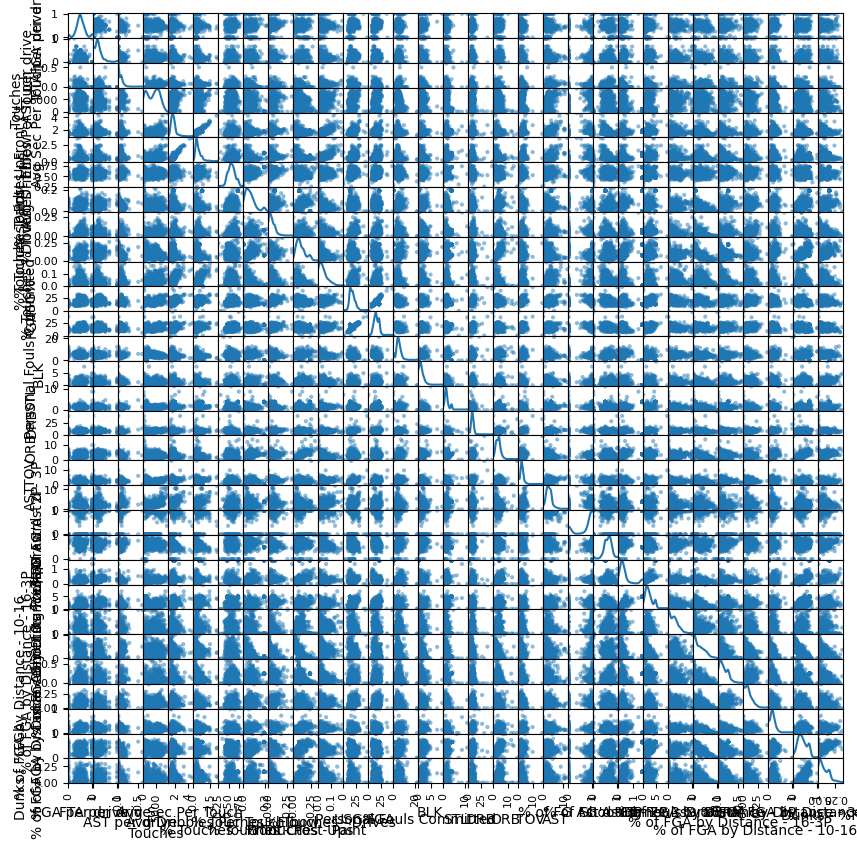

In [112]:
scatter_matrix(merged_df, figsize=(10, 10), diagonal='kde')
plt.show()

In [120]:
corr_matrix = merged_df.corr()

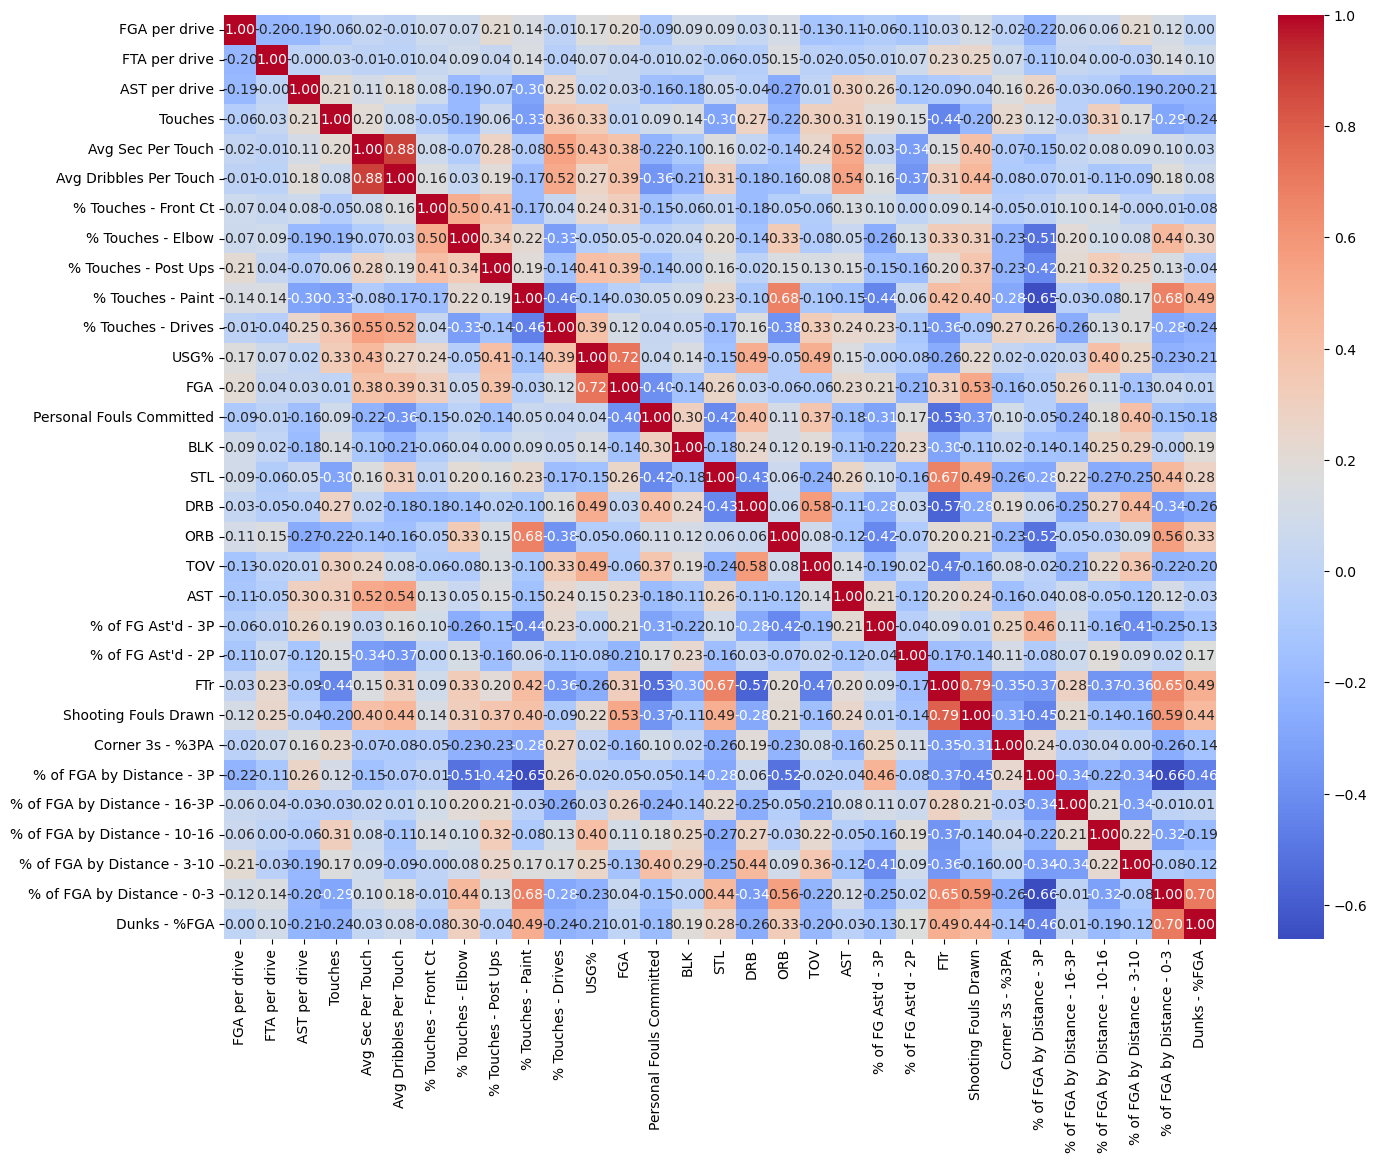

In [122]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.show()

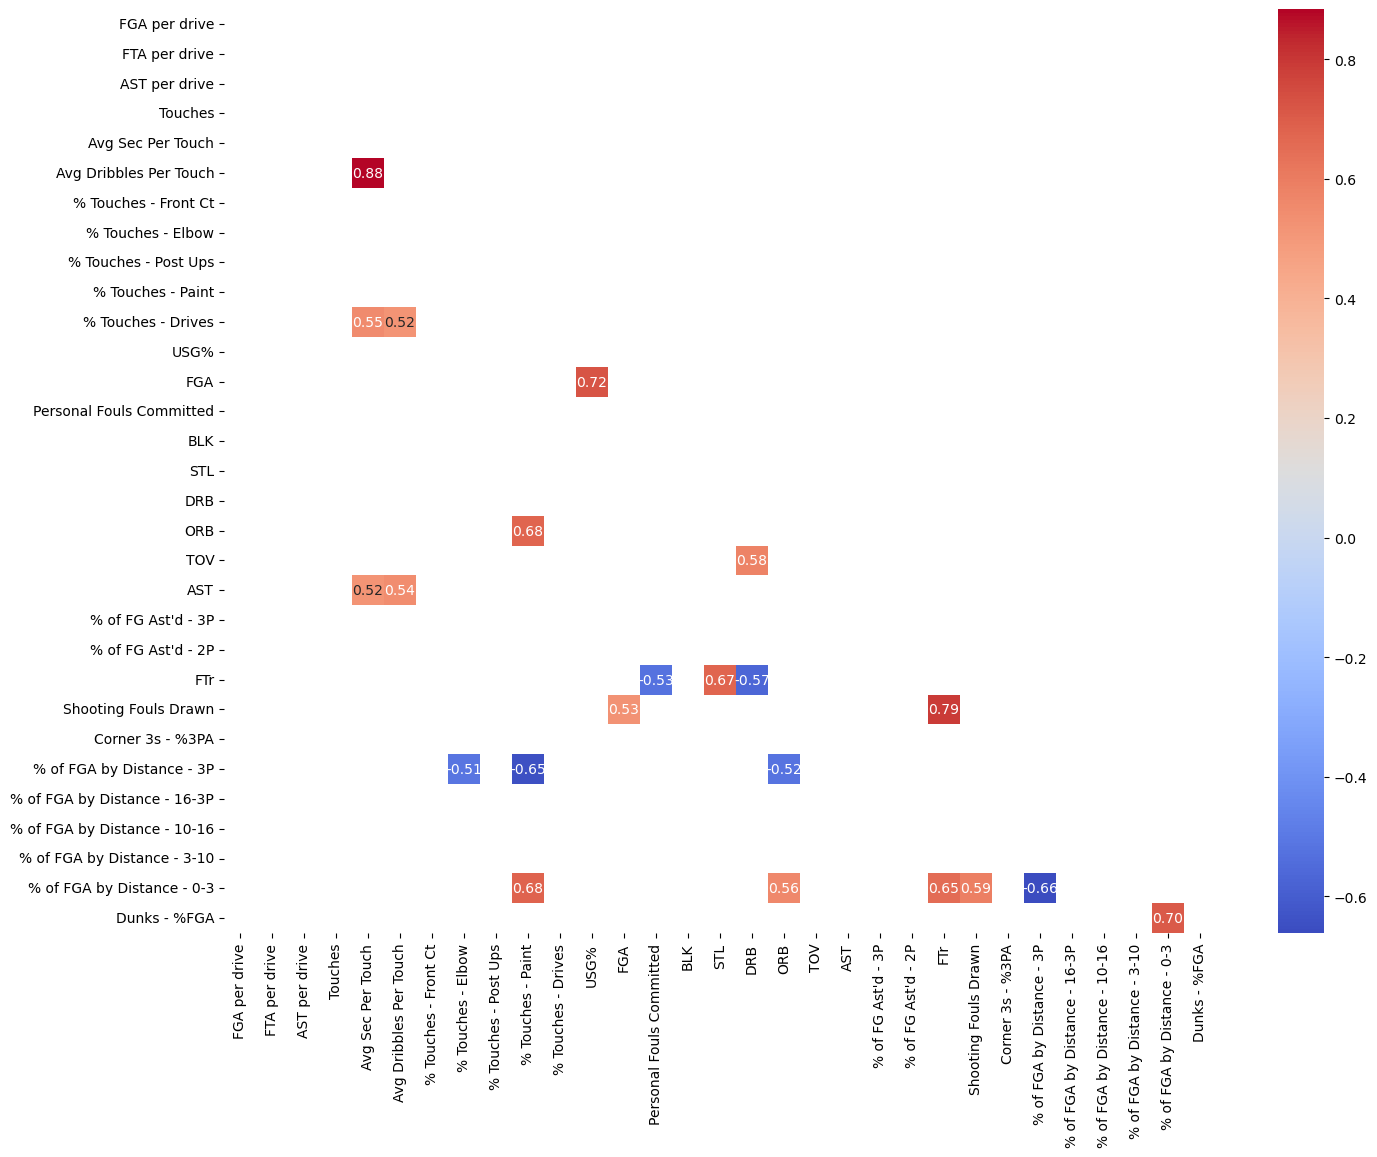

In [123]:
threshold = 0.5  # Only show correlations greater than 0.5
filtered_corr = corr_matrix[corr_matrix.abs() > threshold]

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=mask)
plt.show()